In [34]:
"""
Created on Thu Feb 17 10:46:24 2022

@author: Tanmay Basu
"""

import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from collections import Counter
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report
import pylab as p

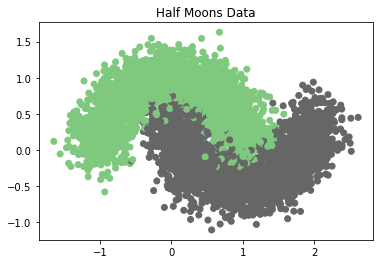


 Training Data Class  Names:	[1,0]

 Instances in Individual Classes: 2000,2000

 Test Data Class  Names:	[0,1]

 Instances in Individual Classes: 500,500
SVC(C=1, class_weight='balanced', kernel='poly', probability=True)
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       500
           1       0.88      0.96      0.92       500

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000


 The cluster labels generated by K-means clustering technique is: 
[1 1 0 ... 0 1 0]

 The cluster labels generated by the given agglomerative clustering technique is: 
[0 0 0 ... 0 0 0]


In [48]:
# Half Moons Data  Generation
np.random.seed(10**7)
data, labels = datasets.make_moons(n_samples=5000, noise=0.2)

plt.scatter(data[:,0],data[:,1],c=labels,cmap=plt.cm.Accent)
plt.title("Half Moons Data")
plt.show()

# Splitting into Training and Test Data

trn_data, tst_data, trn_cat, tst_cat = train_test_split(data, labels, test_size=0.20, random_state=42,stratify=labels)   

trn_cat=[str(x) for x in trn_cat]
print('\n Training Data Class  Names:\t['+','.join(list(Counter(trn_cat).keys()))+']\n')
clas_labels=[str(x) for  x in list(Counter(trn_cat).values())]
print(' Instances in Individual Classes: '+','.join(clas_labels))

tst_cat=[str(x) for x in tst_cat]
print('\n Test Data Class  Names:\t['+','.join(list(Counter(tst_cat).keys()))+']\n')
clas_labels=[str(x) for  x in list(Counter(tst_cat).values())]
print(' Instances in Individual Classes: '+','.join(clas_labels))

     # Classification
     
clf1 = LogisticRegression(solver='liblinear',class_weight='balanced') 
clf2 = svm.SVC(class_weight='balanced',kernel='linear',C=1,probability=True)
clf3 = svm.SVC(class_weight='balanced',kernel='rbf',C=1,probability=True)
clf4 = svm.SVC(class_weight='balanced',kernel='poly',C=1,probability=True)
clf5 = svm.SVC(class_weight='balanced',kernel='sigmoid',C=1,probability=True)
# plot and implement these functions in rbf
# for clf in [clf1,clf2,clf3,clf4,clf5]:
for clf in [clf4]:
    clf.fit(trn_data,trn_cat)
    predicted=clf.predict(tst_data)
    print(clf)
    print(classification_report(tst_cat, predicted, target_names=['0','1']))

       # Clustering 

    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
    print('\n The cluster labels generated by K-means clustering technique is: ') 
    print(kmeans.labels_)

    from sklearn.cluster import AgglomerativeClustering
    clustering = AgglomerativeClustering(linkage='single').fit(data)
    print('\n The cluster labels generated by the given agglomerative clustering technique is: ')
    print(clustering.labels_)

In [29]:
len(trn_cat)

4000

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 30 10:44:03 2022

@author: Tanmay Basu
"""


import csv,os,re,sys,codecs
import numpy as np
import matplotlib.pyplot as plt
import joblib,  statistics
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter


class data_classification():
     def __init__(self,path='classification_codes/',clf_opt='lr',no_of_selected_features=None):
        self.path = path
        self.clf_opt=clf_opt
        self.no_of_selected_features=no_of_selected_features
        if self.no_of_selected_features!=None:
            self.no_of_selected_features=int(self.no_of_selected_features) 

# Selection of classifiers  
     def classification_pipeline(self):    
    # AdaBoost 
        if self.clf_opt=='ab':
            print('\n\t### Training AdaBoost Classifier ### \n')
            be1 = svm.SVC(kernel='linear', class_weight='balanced',probability=True)              
            be2 = LogisticRegression(solver='liblinear',class_weight='balanced') 
            be3 = DecisionTreeClassifier(max_depth=50)
#            clf = AdaBoostClassifier(algorithm='SAMME',n_estimators=100)            
            clf = AdaBoostClassifier(algorithm='SAMME.R',n_estimators=100)
            clf_parameters = {
            'clf__base_estimator':(be1,be2,be3),
            'clf__random_state':(0,10),
            }      
    # Decision Tree
        elif self.clf_opt=='dt':
            print('\n\t### Training Logistic Regression Classifier ### \n')
            clf = DecisionTreeClassifier(random_state=40) 
            clf_parameters = {
            'clf__criterion':('gini', 'entropy'), 
            'clf__max_features':('auto', 'sqrt', 'log2'),
            'clf__max_depth':(10,40,45,60),
            'clf__ccp_alpha':(0.009,0.01,0.05,0.1),
            } 
    # Logistic Regression 
        elif self.clf_opt=='lr':
            print('\n\t### Training Logistic Regression Classifier ### \n')
            clf = LogisticRegression(solver='liblinear',class_weight='balanced') 
            clf_parameters = {
            'clf__random_state':(0,10),
            } 
    # Linear SVC 
        elif self.clf_opt=='ls':   
            print('\n\t### Training Linear SVC Classifier ### \n')
            clf = svm.LinearSVC(class_weight='balanced')  
            clf_parameters = {
            'clf__C':(0.1,1,100),
            }         
    # Multinomial Naive Bayes
        elif self.clf_opt=='nb':
            print('\n\t### Training Multinomial Naive Bayes Classifier ### \n')
            clf = MultinomialNB(fit_prior=True, class_prior=None)  
            clf_parameters = {
            'clf__alpha':(0,1),
            }            
    # Random Forest 
        elif self.clf_opt=='rf':
            print('\n\t ### Training Random Forest Classifier ### \n')
            clf = RandomForestClassifier(max_features=None,class_weight='balanced')
            clf_parameters = {
            'clf__criterion':('entropy','gini'),       
            'clf__n_estimators':(30,50,100),
            'clf__max_depth':(10,20,30,50,100,200),
            }          
    # Support Vector Machine  
        elif self.clf_opt=='svm': 
            print('\n\t### Training SVM Classifier ### \n')
            clf = svm.SVC(class_weight='balanced',probability=True)  
            clf_parameters = {
            'clf__C':(0.1,1,100),
#             'clf__kernel':('linear','rbf','poly','sigmoid'),
            }
        else:
            print('Select a valid classifier \n')
            sys.exit(0)        
        return clf,clf_parameters     
# Load the data 
     def get_data(self):
#         fl=open(self.path+'winequality_white.csv',"r")  
#         reader = list(csv.reader(fl,delimiter='\n')) 
#         fl.close()
#         data=[]; labels=[];
#         for item in reader[1:]:
#             item=''.join(item).split(';')
#             labels.append(item[-1]) 
#             data.append(item[:-1])
#         # labels=[int(''.join(item)) for item in labels]
#         data=np.asarray(data,dtype = float)
#         print('Class  Names: '+','.join(list(Counter(labels).keys())))
#         no_of_members=','.join([str(item) for item in list(Counter(labels).values())])
#         print('Number of Members in Individual Classes: '+ no_of_members)   
        df = pd.read_csv('classification_codes/winequality_white.csv',delimiter=';')
        data = df.drop(columns='quality')
        labels = df['quality']
        # Training and Test Split           
        trn_data, tst_data, trn_cat, tst_cat = train_test_split(data, labels, test_size=0.25, random_state=42,stratify=labels)   

        # ftrn = open(self.path+"training_data.csv", "r")
        # trn_data = list(csv.reader(ftrn,delimiter=',',quoting=csv.QUOTE_NONNUMERIC)) 
        # ftrn.close()
        
        # ftrn = open(self.path+"training_data_class_labels.csv", "r")
        # reader = list(csv.reader(ftrn,delimiter='\n'))
        # trn_cat=[int(''.join(item)) for item in reader] 
        # ftrn.close()
        
        # ftst = open(self.path+"test_data.csv", "r")
        # tst_data = list(csv.reader(ftst,delimiter=',',quoting=csv.QUOTE_NONNUMERIC))
        # ftst.close()
        
        # ftst = open(self.path+"test_data_class_labels.csv", "r")
        # reader = list(csv.reader(ftst,delimiter='\n'))
        # tst_cat=[int(''.join(item)) for item in reader] 
        # ftst.close()
        
        return trn_data, tst_data, trn_cat, tst_cat
    
# Classification using the Gold Statndard after creating it from the raw text    
     def classification(self):  
   # Get the data
        trn_data, tst_data, trn_cat, tst_cat=self.get_data()

        clf,clf_parameters=self.classification_pipeline()
        pipeline = Pipeline([
                    ('feature_selection', SelectKBest(chi2, k=self.no_of_selected_features)),                         # k=1000 is recommended 
            #        ('feature_selection', SelectKBest(mutual_info_classif, k=self.no_of_selected_features)),        
                    ('clf', clf),])
        grid = GridSearchCV(pipeline,clf_parameters,scoring='f1_macro',cv=2)          
        grid.fit(trn_data,trn_cat)     
        clf= grid.best_estimator_  
        print('\n\n The best set of parameters of the pipiline are: ')
        print(clf)     
        joblib.dump(clf, self.path+'trn_model.joblib')
        predicted=clf.predict(tst_data)
    # Evaluation
        class_names=list(Counter(tst_cat).keys())
        class_names = [str(x) for x in class_names] 
        print('\n The classes are: ')
        print(class_names) 
    # Evaluation
        print('\n *************** Confusion Matrix ***************  \n')
        print (confusion_matrix(tst_cat, predicted)) 
       
        class_names=list(Counter(tst_cat).keys())
        class_names = [str(x) for x in list(Counter(tst_cat).keys())]        
        print('\n ***************  Scores on Test Data  *************** \n ')
        print(classification_report(tst_cat, predicted, target_names=class_names))        
        

In [64]:
m = data_classification()
# m.get_data()
m.classification()


	### Training Logistic Regression Classifier ### 



C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 4.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transfo

TypeError: '<=' not supported between instances of 'int' and 'NoneType'

In [5]:
import pandas as pd
df = pd.read_csv('classification_codes/winequality_white.csv',delimiter=';')
df.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.0

In [51]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [65]:
df.drop(columns='quality')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [6]:
#!/usr/bin/env python3 
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 31 14:39:19 2022

@author: Tanmay Basu
"""

# from data_classification2 import data_classification

#from data_classification3 import data_classification

clf=data_classification('classification_codes/', clf_opt='svm',no_of_selected_features=4)

clf.classification()



	### Training SVM Classifier ### 



 The best set of parameters of the pipiline are: 
Pipeline(steps=[('feature_selection',
                 SelectKBest(k=4,
                             score_func=<function chi2 at 0x0000025E6AB9C9D0>)),
                ('clf', SVC(C=100, class_weight='balanced', probability=True))])

 The classes are: 
['5', '7', '6', '4', '3', '8', '9']

 *************** Confusion Matrix ***************  

[[  0   1   3   0   0   1   0]
 [  3  23  10   0   4   0   1]
 [  7  81 207  35  18   6  10]
 [ 11  66 182  98  74  74  45]
 [  0  16  31  29  41  62  41]
 [  0   2   8   6   5  14   9]
 [  0   0   0   0   0   1   0]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         5
           7       0.12      0.56      0.20        41
           6       0.47      0.57      0.51       364
           4       0.58      0.18      0.27       550
           3       0

In [8]:
%%latex
akj $\sum$

<IPython.core.display.Latex object>